In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/DataScience/Data/cleaned_merged_data_3days.csv'
df = pd.read_csv(file_path)

In [56]:
df

,group,Date,KWH,Next_3_Days_Energy_Total,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1,2012-09-28,920.374,959.118667,5.0,1.60,73.0,16.70,13.30,8.50,0.20,101300.0,0.0
1,1,2012-09-29,946.774,951.399333,1.0,8.70,146.0,18.10,12.70,8.60,0.00,101830.0,0.0
2,1,2012-09-30,997.614,919.995000,5.0,1.60,71.0,17.30,12.10,6.10,4.20,101870.0,0.0
3,1,2012-10-01,932.968,918.231000,6.0,2.70,85.0,17.90,15.20,13.00,2.60,101190.0,0.0
4,1,2012-10-02,923.616,950.022667,6.0,2.80,85.0,15.10,14.40,10.90,1.20,100970.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27983,55,2014-02-15,1124.513,1070.176000,3.6,3.72,54.8,10.94,7.38,4.44,0.32,101252.0,0.0
27984,55,2014-02-16,1165.853,1018.218000,1.0,8.40,101.0,10.80,6.30,1.90,0.20,100680.0,0.0
27985,55,2014-02-17,1036.378,1010.964667,5.0,0.10,29.0,11.10,6.80,2.70,2.20,100770.0,0.0
27986,55,2014-02-18,1008.297,993.217000,5.0,1.20,45.0,11.00,9.30,7.50,5.80,100860.0,0.0


In [57]:
missing_counts = df.isna().sum()
print(missing_counts)

group                       0
Date                        0
KWH                         0
Next_3_Days_Energy_Total    0
cloud_cover                 0
sunshine                    0
global_radiation            0
max_temp                    0
mean_temp                   0
min_temp                    0
precipitation               0
pressure                    0
snow_depth                  0
dtype: int64


#### cloud_cover processing

In [58]:
df['cloud_cover'].value_counts()

6.000000    4488
7.000000    3903
5.000000    3665
4.000000    3650
8.000000    3620
3.000000    2753
2.000000    2310
1.000000    1699
0.000000    1430
5.400000      54
5.600000      47
4.800000      41
4.600000      38
5.200000      37
5.800000      35
6.200000      30
4.400000      28
4.200000      26
6.600000      22
6.400000      22
3.800000      18
3.400000      13
6.800000      12
3.600000       9
2.800000       8
7.200000       8
3.200000       7
7.400000       5
4.748274       3
7.600000       3
2.400000       2
2.200000       1
7.800000       1
Name: cloud_cover, dtype: int64

In [59]:
condition = (df['cloud_cover'] % 1 != 0) | (df['cloud_cover'] > 8.0)

# 从DataFrame中去除满足条件的行
df = df[~condition]

In [60]:
df['cloud_cover'].value_counts()

6.0    4488
7.0    3903
5.0    3665
4.0    3650
8.0    3620
3.0    2753
2.0    2310
1.0    1699
0.0    1430
Name: cloud_cover, dtype: int64

#### change the sunshine into hours

In [61]:
df['sunshine'] = df['sunshine'] * 60

<ipython-input-61-d19a2b1fcbb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sunshine'] = df['sunshine'] * 60


#### change snow depth into a category value

In [62]:
df['snow_depth'].value_counts()

0.0    27290
3.0      110
2.0       55
5.0       55
0.6        4
1.0        2
1.2        2
Name: snow_depth, dtype: int64

In [63]:
df.loc[df['snow_depth'] > 0, 'snow_depth'] = 1.0

In [64]:
df['snow_depth'].value_counts()

0.0    27290
1.0      228
Name: snow_depth, dtype: int64

#### change the precipitation into category value

In [65]:
df['precipitation'].value_counts()

0.00    11479
0.20     3790
0.40     1045
1.80      662
1.20      603
        ...  
2.44        1
1.28        1
2.48        1
2.32        1
3.32        1
Name: precipitation, Length: 142, dtype: int64

In [66]:
bins = [-float('inf'), 0.1, 2.5, 10, 50, float('inf')]
labels = [0, 1, 2, 3, 4]

df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)

<ipython-input-66-c7ee6bde3366>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)


In [67]:
df['precipitation'].value_counts()

0    11482
1     9129
2     5702
3     1205
4        0
Name: precipitation, dtype: int64

#### one-hot encoding

In [68]:
df_encoded = pd.get_dummies(df['cloud_cover'], prefix='cloud_cover')

df = pd.concat([df, df_encoded], axis=1)

df.drop('cloud_cover', axis=1, inplace=True)

In [69]:
df_encoded = pd.get_dummies(df['precipitation'], prefix='precipitation')

df = pd.concat([df, df_encoded], axis=1)

df.drop('precipitation', axis=1, inplace=True)

In [70]:
df_encoded = pd.get_dummies(df['snow_depth'], prefix='snow_depth')

df = pd.concat([df, df_encoded], axis=1)

df.drop('snow_depth', axis=1, inplace=True)

In [71]:
df.head(5)

,group,Date,KWH,Next_3_Days_Energy_Total,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure,...,cloud_cover_6.0,cloud_cover_7.0,cloud_cover_8.0,precipitation_0,precipitation_1,precipitation_2,precipitation_3,precipitation_4,snow_depth_0.0,snow_depth_1.0
0,1,2012-09-28,920.374,959.118667,96.0,73.0,16.7,13.3,8.5,101300.0,...,0,0,0,0,1,0,0,0,1,0
1,1,2012-09-29,946.774,951.399333,522.0,146.0,18.1,12.7,8.6,101830.0,...,0,0,0,1,0,0,0,0,1,0
2,1,2012-09-30,997.614,919.995000,96.0,71.0,17.3,12.1,6.1,101870.0,...,0,0,0,0,0,1,0,0,1,0
3,1,2012-10-01,932.968,918.231000,162.0,85.0,17.9,15.2,13.0,101190.0,...,1,0,0,0,0,1,0,0,1,0
4,1,2012-10-02,923.616,950.022667,168.0,85.0,15.1,14.4,10.9,100970.0,...,1,0,0,0,1,0,0,0,1,0


In [72]:
df_out = df.copy()

#### delete the date

In [73]:
del df['Date']
del df['group']

In [74]:
df.head()

,KWH,Next_3_Days_Energy_Total,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure,cloud_cover_0.0,cloud_cover_1.0,...,cloud_cover_6.0,cloud_cover_7.0,cloud_cover_8.0,precipitation_0,precipitation_1,precipitation_2,precipitation_3,precipitation_4,snow_depth_0.0,snow_depth_1.0
0,920.374,959.118667,96.0,73.0,16.7,13.3,8.5,101300.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,946.774,951.399333,522.0,146.0,18.1,12.7,8.6,101830.0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,997.614,919.995000,96.0,71.0,17.3,12.1,6.1,101870.0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,932.968,918.231000,162.0,85.0,17.9,15.2,13.0,101190.0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,923.616,950.022667,168.0,85.0,15.1,14.4,10.9,100970.0,0,0,...,1,0,0,0,1,0,0,0,1,0


#### normalization

In [75]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'pressure', 'KWH']

scaler = MinMaxScaler()


df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

#### check if any INF or NAN

In [76]:
inf_check = np.isinf(df)
print(inf_check.any())

KWH                         False
Next_3_Days_Energy_Total    False
sunshine                    False
global_radiation            False
max_temp                    False
mean_temp                   False
min_temp                    False
pressure                    False
cloud_cover_0.0             False
cloud_cover_1.0             False
cloud_cover_2.0             False
cloud_cover_3.0             False
cloud_cover_4.0             False
cloud_cover_5.0             False
cloud_cover_6.0             False
cloud_cover_7.0             False
cloud_cover_8.0             False
precipitation_0             False
precipitation_1             False
precipitation_2             False
precipitation_3             False
precipitation_4             False
snow_depth_0.0              False
snow_depth_1.0              False
dtype: bool


In [77]:
inf_check = np.isnan(df)
print(inf_check.any())

KWH                         False
Next_3_Days_Energy_Total    False
sunshine                    False
global_radiation            False
max_temp                    False
mean_temp                   False
min_temp                    False
pressure                    False
cloud_cover_0.0             False
cloud_cover_1.0             False
cloud_cover_2.0             False
cloud_cover_3.0             False
cloud_cover_4.0             False
cloud_cover_5.0             False
cloud_cover_6.0             False
cloud_cover_7.0             False
cloud_cover_8.0             False
precipitation_0             False
precipitation_1             False
precipitation_2             False
precipitation_3             False
precipitation_4             False
snow_depth_0.0              False
snow_depth_1.0              False
dtype: bool


In [78]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is available and being used


In [79]:
from sklearn.model_selection import train_test_split

X = df.drop(['Next_3_Days_Energy_Total'], axis=1)
y = df[['Next_3_Days_Energy_Total']]

#### construct the TCN model

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义TCN的残差块
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, dilation):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.activation1 = nn.ReLU()
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.activation2 = nn.ReLU()

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.activation1(out)
        out = self.conv2(out)
        out = self.activation2(out)
        out = torch.add(out, residual)  # 跳跃连接，将残差与原始输入相加
        return out

# 定义TCN
class TCN(nn.Module):
    def __init__(self, in_channels, num_residual_blocks, residual_channels, kernel_size, stride, padding):
        super(TCN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, residual_channels, kernel_size, stride=stride, padding=padding)
        self.activation1 = nn.ReLU()
        self.residual_blocks = nn.ModuleList([
            ResidualBlock(residual_channels, residual_channels, kernel_size, stride, dilation * (kernel_size - 1) // 2, dilation)
            for dilation in [2**i for i in range(num_residual_blocks)]
        ])
        self.fc = nn.Linear(residual_channels, 1)  # 回归问题的输出是一个单一值，因此使用1个输出单元

    def forward(self, x):
        x = x.permute(0, 2, 1)  # 调整通道维度的顺序
        out = self.conv1(x)
        out = self.activation1(out)
        for residual_block in self.residual_blocks:
            out = residual_block(out)
        out = torch.mean(out, dim=2)  # 对时间维度进行平均池化
        out = self.fc(out)
        return out

#### early stop function

In [81]:
# 定义早停函数
def early_stopping(val_loss, patience=10, delta=0):
  if len(val_loss) < patience + 1:
    return False

  best_loss = min(val_loss[:-patience])
  last_loss = val_loss[-1]

  if last_loss > best_loss - delta:
    return True

  return False

#### define function for training and validation

In [82]:
from torch.optim.lr_scheduler import StepLR

# 定义训练和验证过程
def train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs, patience=30, delta=0.5):
    train_loss_history = []
    val_loss_history = []
    best_model_state = None

    # 学习率衰减
    step_size = 15
    gamma = 0.9
    scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

    # 训练模型
    for epoch in range(num_epochs):
        model.train()
        train_total_loss = 0.0
        for i, (X_batch, y_batch) in enumerate(train_loader):
            # Clear gradients from the previous iteration
            optimizer.zero_grad()

            # Forward pass: compute model predictions
            predictions = model(X_batch.to(device))
            #print('here is prediction：', predictions.shape)

            # Compute the loss
            loss = criterion(predictions, y_batch.to(device))
            #print('here is loss：', loss.item())

            # Backpropagation: compute gradients of the loss with respect to model parameters
            loss.backward()

            # Optimization: update model parameters using the gradients
            optimizer.step()

            # Accumulate the total loss for this epoch

            train_total_loss += loss.item()

            #print(total_loss)
        # Calculate the average loss for this epoch
        scheduler.step()
        train_loss = train_total_loss / len(train_loader)
        train_loss_history.append(train_loss)
        #print('toatl loss: ', total_loss)
        #print(len(train_loader))
        #print('average loss: ', average_loss)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss:.4f}')

        model.eval()
        with torch.no_grad():
            val_total_loss = 0.0
            for batch_X, batch_y in val_loader:
                predictions = model(batch_X.to(device))
                loss = criterion(predictions, batch_y.to(device))
                val_total_loss += loss.item()
            validation_loss = val_total_loss / len(val_loader)
            val_loss_history.append(validation_loss)

        # 检查是否早停
        if early_stopping(val_loss_history, patience, delta):
            print("\n Early stopping triggered!")
            best_model_state = model.state_dict()
            break

    return best_model_state

#### reshape data

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def reshape_data(X, y, num_channels):
    num_samples = X.shape[0] - num_channels + 1
    channels = [X.iloc[i:i+num_channels, :] for i in range(num_samples)]
    #x = num_channels
    X_reshaped = np.array(channels).reshape(num_samples, num_channels, X.shape[1])
    y_reshaped = y[-num_samples:]
    return X_reshaped, y_reshaped

#### setting kernel

In [84]:
def get_kernel_settings(index):
    if index == 0:
        kernel_size = 3
        stride = 1
        padding = 1
    elif index == 1:
        kernel_size = 5
        stride = 1
        padding = 2
    else:
        raise ValueError("Invalid index. Use 0, or 1 to select the corresponding kernel setting.")

    return kernel_size, stride, padding

#### fitness function

In [ ]:
def TCN_fitness_function(params):

    # Defince the parameters
    num_residual_blocks = int(params[0])
    residual_channels = int(params[1])
    learning_rate = params[2]
    batch_size = [32, 64, 128, 256][int(params[3])]
    weight_decay = params[4]
    sequence_length = int(params[5])
    kernel_size, stride, padding = get_kernel_settings(int(params[6]))
    epoch = [100, 200][int(params[7])]


    X_reshape, y_reshape = reshape_data(X, y, sequence_length)

    # 划分训练集为新的训练集和验证集
    X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_reshape, test_size=0.2, random_state=42)

    # 划分训练集为新的训练集和验证集
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



    torch.manual_seed(42)  # set the random seed

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


    # Specify the batch size
    batch_size = batch_size

    # Create DataLoaders for training, validation, and testing
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)



    # 初始化模型和优化器
    in_channels = X_train.shape[2]
    #device = torch.device("cuda")
    model = TCN(in_channels, num_residual_blocks, residual_channels, kernel_size, stride, padding).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = nn.L1Loss()
    num_epochs = epoch

    # train!!!
    best_model_state = train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=num_epochs, patience=30, delta=0.5)
    #print('this is :', best_model_state)
    #model.load_state_dict(best_model_state)
    model.eval()

    with torch.no_grad():
        total_mae = 0.0
        for batch_X, batch_y in val_loader:
            # Forward pass: compute model predictions
            predictions = model(batch_X.to(device))

            # Compute the loss (assuming you have defined the loss function as 'criterion')
            mae = criterion(predictions, batch_y.to(device))

            # Accumulate the total loss for this validation set
            total_mae += mae.item()

        # Calculate the average loss for the entire validation set
        #print(total_mse)
        mae_loss = total_mae / len(val_loader)

        # Print the average loss for this validation set
        #print(f"Validation Loss: {validation_loss:.4f}")

    return mae_loss

In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=70a30d4d1e898d8853069c2786ec8e14d17b6ba8851dda772d37afb8701d2478
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


#### GA

Epoch [10/100], Loss: 43.9774
Epoch [20/100], Loss: 37.9517
Epoch [30/100], Loss: 34.4362
Epoch [40/100], Loss: 30.8224

 Early stopping triggered!
Epoch [10/100], Loss: 38.4488
Epoch [20/100], Loss: 35.8609
Epoch [30/100], Loss: 35.6755

 Early stopping triggered!
Epoch [10/200], Loss: 40.2522
Epoch [20/200], Loss: 33.4594
Epoch [30/200], Loss: 32.7310
Epoch [40/200], Loss: 30.0738

 Early stopping triggered!
Epoch [10/100], Loss: 44.1306
Epoch [20/100], Loss: 37.4779
Epoch [30/100], Loss: 34.4090

 Early stopping triggered!
Epoch [10/200], Loss: 43.4664
Epoch [20/200], Loss: 37.4520
Epoch [30/200], Loss: 96.4787

 Early stopping triggered!
||________________________________________________ 4.0% GA is running...Epoch [10/100], Loss: 44.1306
Epoch [20/100], Loss: 37.4779
Epoch [30/100], Loss: 34.4090

 Early stopping triggered!
Epoch [10/100], Loss: 44.1306
Epoch [20/100], Loss: 37.4779
Epoch [30/100], Loss: 34.4090

 Early stopping triggered!
Epoch [10/100], Loss: 43.1055
Epoch [20/10

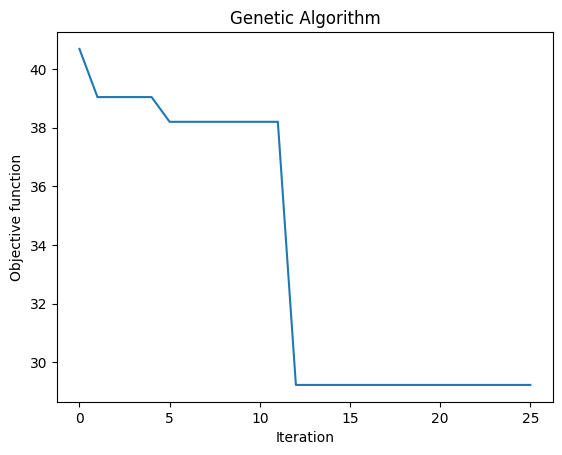

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from geneticalgorithm import geneticalgorithm as ga


varbound = np.array([          [1, 5],              # num_residual_blocks
                     [10, 500],             # residual_channels
                     [0.005, 0.01],          # learning rate
                     [0, 3],               # batch size
                     [0, 0.01],              # L2 norm
                     [10, 30],              # sequence length
                     [0, 1],               # kernel
                     [0, 1]                # epoch
                     ])



# 创建遗传算法对象
algorithm_param = {'max_num_iteration': 25, 'population_size': 5, 'elit_ratio': 0.01,
                   'parents_portion': 0.3, 'crossover_probability': 0.5, 'mutation_probability': 0.1,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': 15}
model = ga(function=TCN_fitness_function, dimension=8, variable_type='real',
           variable_type_mixed  = np.array(['int', 'int', 'real', 'int', 'real', 'int', 'int', 'int']) ,variable_boundaries=varbound,
           algorithm_parameters=algorithm_param, function_timeout = 500)

# 运行遗传算法进行优化
model.run()

# 获得优化的超参数组合
best_params = model.output_dict['variable']




In [85]:
# Defince the parameters
num_residual_blocks = int(2.00000000e+00)
residual_channels = int(2.03000000e+02)
learning_rate = 9.46805186e-03
batch_size = [32, 64, 128, 256][int(1.00000000e+00)]
weight_decay = 2.26235708e-03
sequence_length = int(2.80000000e+01)
kernel_size, stride, padding = get_kernel_settings(int(0.00000000e+00))
epoch = [100, 200][int(1.00000000e+00)]


X_reshape, y_reshape = reshape_data(X, y, sequence_length)

# 划分训练集为新的训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_reshape, test_size=0.2, random_state=42)
#print(len(y_test))
# 划分训练集为新的训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



#torch.manual_seed(42)  # set the random seed

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


# Specify the batch size
batch_size = batch_size

# Create DataLoaders for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)



# 初始化模型和优化器
in_channels = X_train.shape[2]
#device = torch.device("cuda")
model = TCN(in_channels, num_residual_blocks, residual_channels, kernel_size, stride, padding).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.L1Loss()
num_epochs = epoch

# train!!!
best_model_state = train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=num_epochs, patience=30, delta=0.005)
#print('this is :', best_model_state)
#model.load_state_dict(best_model_state)


Epoch [10/200], Loss: 44.9216
Epoch [20/200], Loss: 38.3275
Epoch [30/200], Loss: 33.3480
Epoch [40/200], Loss: 31.8589

 Early stopping triggered!


In [86]:
def median_absolute_error(y_true, y_pred):
    absolute_errors = torch.abs(y_true - y_pred)
    return torch.median(absolute_errors).item()

In [87]:
def pearson_correlation(y_true, y_pred):
    y_true_mean = torch.mean(y_true)
    y_pred_mean = torch.mean(y_pred)
    numerator = torch.sum((y_true - y_true_mean) * (y_pred - y_pred_mean))
    denominator = torch.sqrt(torch.sum((y_true - y_true_mean) ** 2)) * torch.sqrt(torch.sum((y_pred - y_pred_mean) ** 2))
    pearson_corr = numerator / denominator
    return pearson_corr.item()

In [88]:
def index_of_agreement(y_true, y_pred):
    numerator = torch.sum((y_true - y_pred) ** 2)
    denominator = torch.sum((torch.abs(y_pred - torch.mean(y_true)) + torch.abs(y_true - torch.mean(y_true))) ** 2)
    index_agreement = 1 - (numerator / denominator)
    return index_agreement.item()

In [89]:
model.eval()

with torch.no_grad():
    total_mse = 0.0
    total_mae = 0.0
    total_md_ae = 0.0
    total_mape = 0.0
    total_rmspe = 0.0
    total_pearson_corr = 0.0
    total_index_agreement = 0.0
    predictions_list = []
    #batch_X, _ = next(iter(test_loader))
    #predictions = model(batch_X.to(device))
    #num_predictions = predictions.shape[1]
    #columns = ["prediction_batch_" + str(i) for i in range(len(test_loader))]
    #test_df = pd.DataFrame(columns=columns)
    # 创建一个空的 DataFrame 来存储验证集数据和预测值
    #columns = ["feature_" + str(i) for i in range(test_data.shape[1])] + ["prediction"]
    #val_df_with_preds = pd.DataFrame(columns=columns)


    for i, (batch_X, batch_y) in enumerate(test_loader):
        # Forward pass: compute model predictions
        predictions = model(batch_X.to(device))

        predictions_list.append(predictions.cpu().numpy())
        #num_predictions = predictions.shape[1]

        #test_df.loc[i] = predictions.cpu().detach().numpy()

        criterion = nn.MSELoss()

        # Compute the loss (assuming you have defined the loss function as 'criterion')
        mse = criterion(predictions, batch_y.to(device))
        total_mse += mse.item()

        # Compute the loss (MAE)
        mae = torch.mean(torch.abs(predictions - batch_y.to(device)))
        total_mae += mae.item()

        # Compute the loss (MdAE)
        md_ae = median_absolute_error(predictions, batch_y.to(device))
        total_md_ae += md_ae

        # Compute the loss (MAPE)
        absolute_percentage_errors = torch.abs((batch_y.to(device) - predictions) / batch_y.to(device))
        absolute_percentage_errors = absolute_percentage_errors[~torch.isinf(absolute_percentage_errors) & ~torch.isnan(absolute_percentage_errors)]
        mape = torch.mean(absolute_percentage_errors).item() * 100
        total_mape += mape

        # Compute the loss (RMSPE)
        squared_percentage_errors = ((batch_y.to(device) - predictions) / batch_y.to(device)) ** 2
        squared_percentage_errors = squared_percentage_errors[~torch.isinf(squared_percentage_errors)]
        rmspe = torch.sqrt(torch.mean(squared_percentage_errors)).item() * 100
        total_rmspe += rmspe

        # Compute the Pearson Correlation Coefficient
        pearson_corr = pearson_correlation(batch_y.to(device), predictions)
        total_pearson_corr += pearson_corr

        # Compute the Index of Agreement
        index_agreement = index_of_agreement(batch_y.to(device), predictions)
        total_index_agreement += index_agreement





        # Calculate the average loss for the entire validation set
        #print(total_mse)
    mse_loss = total_mse / len(test_loader)
    mae_loss = total_mae / len(test_loader)
    rmse_loss = np.sqrt(mse_loss)
    md_ae_loss = total_md_ae / len(test_loader)
    mape_loss = total_mape / len(test_loader)
    rmspe_loss = total_rmspe / len(test_loader)
    pearson_corr_avg = total_pearson_corr / len(test_loader)
    index_agreement_avg = total_index_agreement / len(test_loader)

print(f'MSE: {mse_loss:.4f}')
print(f'RMSE: {mae_loss:.4f}')
print(f'MAE: {rmse_loss:.4f}')
print(f'MdAE: {md_ae_loss:.4f}')
print(f'MAPE: {mape_loss:.4f}')
print(f'RMSPE: {rmspe_loss:.4f}')
print(f'Pearson Coefficient: {pearson_corr_avg:.4f}')
print(f'Index of Agreement (IoA): {index_agreement_avg:.4f}')

#len(predictions_list)

MSE: 2724.3800
RMSE: 36.6110
MAE: 52.1956
MdAE: 29.1739
MAPE: 3.8402
RMSPE: 6.1513
Pearson Coefficient: 0.9790
Index of Agreement (IoA): 0.9853


### prediction value

In [90]:
len(y_test)

5499

In [91]:
y_test.index

Int64Index([13887, 27015,  4414, 14820,  5294,  7678, 20515, 22403, 16435,
             4346,
            ...
             5758, 18465,  3354, 18436, 13317, 26197, 21948,  5532,  9807,
             8661],
           dtype='int64', length=5499)

In [ ]:
predictions_list

In [93]:
predictions = []

for i in predictions_list:
    # 将张量展平为一维数组，并添加到 flat_predictions 列表中
    predictions.extend(i)

In [94]:
len(predictions)

5499

In [95]:
from sklearn.metrics import mean_absolute_error

# 假设 y_true 是实际值数组，y_pred 是预测值数组
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 36.60910261696491


In [96]:
df_out = df_out.loc[y_test.index]

In [97]:
df_out['Predictions'] = predictions

In [98]:
df_out.to_csv('TCN3day_EC.csv', index=False)

In [99]:
from google.colab import drive

# 将 Google Drive 挂载到 Colab
drive.mount('/content/drive')

# 假设 df 是您的 DataFrame，保存到 Google Drive 根目录下的 my_dataframe.csv 文件
df_out.to_csv('/content/drive/MyDrive/TCN3day_EC.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### SHAP

In [ ]:
!pip install shap

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

In [ ]:
X_train_tensor.shape

torch.Size([17593, 28, 23])

In [ ]:
explainer = shap.DeepExplainer(model, X_train_tensor)

In [ ]:
import random

# randomly pick 1000 sample
num_samples = 1000
random_indices = random.sample(range(X_train_tensor.shape[0]), num_samples)
selected_samples = X_train_tensor[random_indices]


In [ ]:
selected_samples.shape

torch.Size([1000, 28, 23])

In [ ]:
shap_values = explainer.shap_values(selected_samples, ranked_outputs=1)

In [ ]:
shap_values.shape

(1000, 28, 23)

In [ ]:
has_nan = np.isnan(shap_values).any()

if has_nan:
    print("Array contains NaN values.")
else:
    print("Array does not contain NaN values.")

Array does not contain NaN values.


In [ ]:
shap_values_output = np.mean(shap_values, axis=1)
print(shap_values_output.shape)

(1000, 23)


In [ ]:
selected_samples.shape

torch.Size([1000, 28, 23])

In [ ]:
selected_samples = torch.mean(selected_samples, dim=1)
print(selected_samples.shape)

torch.Size([1000, 23])


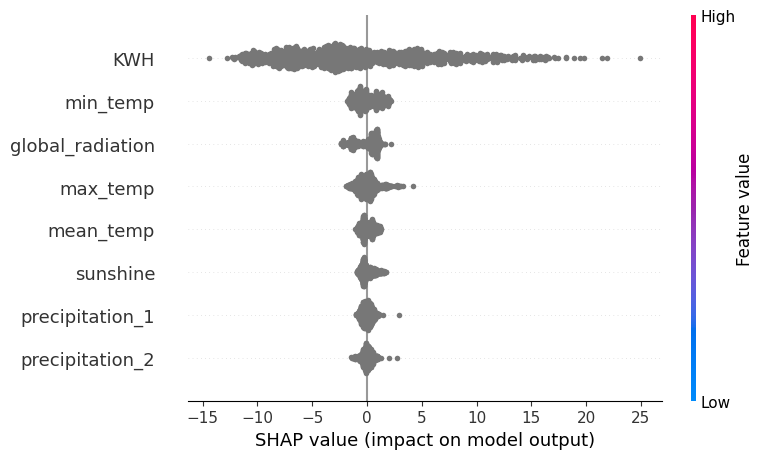

In [ ]:

column_names = [
    "KWH", "sunshine", "global_radiation","max_temp","mean_temp","min_temp","pressure","cloud_cover_0.0","cloud_cover_1.0",
    "cloud_cover_2.0","cloud_cover_3.0","cloud_cover_4.0","cloud_cover_5.0","cloud_cover_6.0","cloud_cover_7.0",
    "cloud_cover_8.0","precipitation_0","precipitation_1","precipitation_2", "precipitation_3","precipitation_4",
    "snow_depth_0.0","snow_depth_1.0"
]


shap.summary_plot(shap_values_output, features=selected_samples, feature_names=column_names, max_display=8)

#### save the SHAP value file

In [ ]:
import numpy as np


np.savetxt('shap_values_output.csv', shap_values_output, delimiter=',')

In [ ]:
from google.colab import files

# 下载文件到本地
files.download('shap_values_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### save the selected_samples file

In [ ]:
import torch

# 将数据保存到文件，例如CSV格式
torch.save(selected_samples, 'selected_samples.pt')

In [ ]:
from google.colab import files

# 下载文件到本地
files.download('selected_samples.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>